# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ** 
$EX_{(n)}$ = $\frac{n}{n+1}\theta$, $E\frac{n+1}{n}X_{(n)}$ = $\theta$, $E2\overline{X}$ = $\theta$, т.е. несмещённая вторая и третья


Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

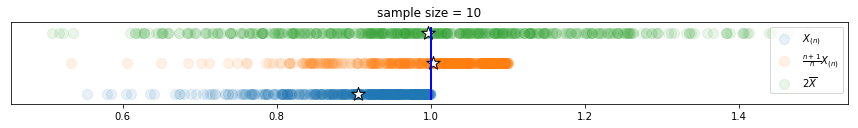

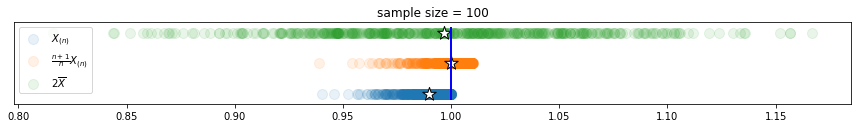

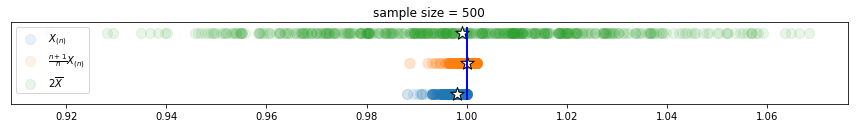

In [5]:
for n in [10, 100, 500]:
    size = 500
    levels = [0, 1, 2]
    labels = ['$X_{(n)}$', '$\\frac{n+1}{n}X_{(n)}$', '$2\overline{X}$']
    
    #Строим оценки
    valuations = []
    valuations.append(sps.uniform.rvs(size=(size, n)).max(axis=1))
    valuations.append(sps.uniform.rvs(size=(size, n)).max(axis=1) * (n+1) / n)
    valuations.append(sps.uniform.rvs(size=(size, n)).mean(axis=1) * 2)

    plt.figure(figsize=(15, 1.5))
    for pos in range(0, 3):
        plt.scatter(valuations[pos], np.zeros_like(valuations[pos]) + levels[pos], 
                    alpha=0.1, s=100, label=labels[pos])
        plt.scatter(valuations[pos].mean(), levels[pos], marker='*', s=200, 
                     color='w', edgecolors='black')

        #Для всего графика:
        plt.vlines(1, -0.2, 2.2, color='b')
        plt.title('sample size = %d' % n)
        plt.yticks([])
        plt.legend()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:**

$ES^2$ = $E\overline{X^2} - E\overline{X}^2$ = $E\overline{X_1^2} - E\frac{1}{n^2}(\sum X_i^2 + \sum X_iX_j)$ = $\frac{n-1}{n} \sigma^2$, т.е. $\frac{n}{n-1}S^2$ - несмещённая, а $S^2$ - смещённая

Для данной модели выполните те же действия, что и с предыдущей.

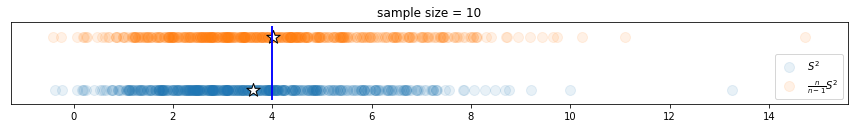

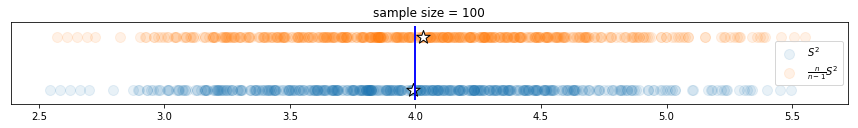

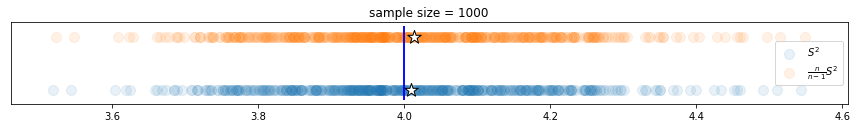

In [7]:
for n in [10, 100, 1000]:
    size = 500
    scale = 2
    levels = [0, 1]
    labels = ['$S^2$', '$\\frac{n}{n-1}S^2$']
    
    #Строим оценки
    valuations = []
    tmp1 = sps.norm.rvs(size=(size, n), loc=0, scale=scale)
    tmp2 = (sps.norm.rvs(size=(size, n), loc=0, scale=scale) ** 2)
    valuations.append(tmp2.mean(axis=1) - tmp1.mean(axis=1) ** 2)
    valuations.append((tmp2.mean(axis=1) - tmp1.mean(axis=1) ** 2) * n / (n-1))

    plt.figure(figsize=(15, 1.5))
    for pos in range(0, 2):
        plt.scatter(valuations[pos], np.zeros_like(valuations[pos]) + levels[pos], 
                    alpha=0.1, s=100, label=labels[pos])
        plt.scatter(valuations[pos].mean(), levels[pos], marker='*', s=200, 
                     color='w', edgecolors='black')

        #Для всего графика:
        plt.vlines(scale ** 2, -0.2, 1.2, color='b')
        plt.title('sample size = %d' % n)
        plt.yticks([])
        plt.legend()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:**

Оценка несмещённая, если её матожидание равно параметру. Т.е. "в среднем" оценка равна параметру. Это, собственно, можно видеть на графиках

При маленькой выборке $x_ср$ может сильно отличаться от x искомого, тем самым завышается точность

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

**Для $\mathcal{N}(\theta, 1)$**

In [67]:
def cumavg(X):
    return X.cumsum() / np.linspace(1, len(X), len(X))

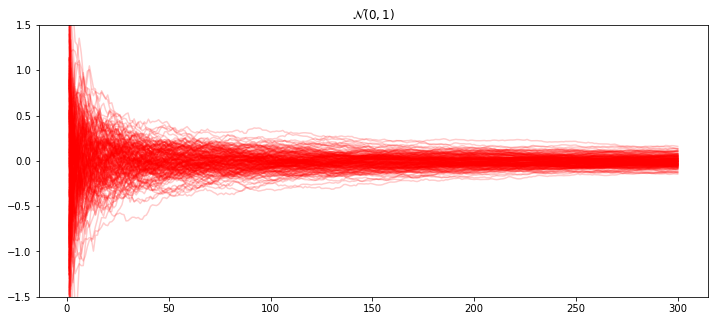

In [9]:
n = 200
size = 300

#Строим оценки
valuation = sps.norm.rvs(size=(n, size), loc=0, scale=1)
valuation = valuation.cumsum(axis=1) / np.linspace(1, size, size)

plt.figure(figsize=(12, 5))
for j in range(0, n):
    plt.plot(range(1, size + 1), valuation[j], alpha=0.2, color='red')
plt.title('$\\mathcal{N}(0, 1)$')
plt.ylim((-1.5, 1.5))
plt.show()

** Для $U[0, 1]$**

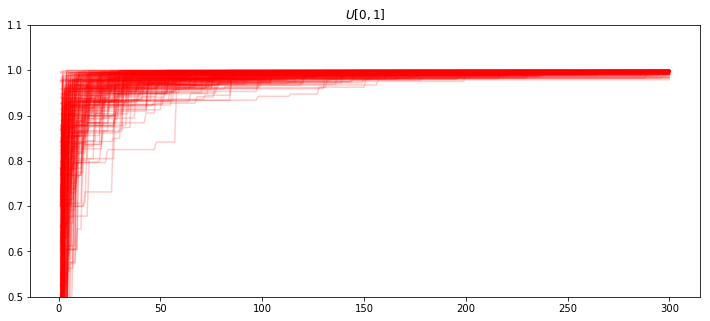

In [10]:
n = 200
size = 300

#Строим оценки
valuation = sps.uniform.rvs(size=(n, size), loc=0, scale=1)
valuation = np.maximum.accumulate(valuation, axis=1)

plt.figure(figsize=(12, 5))
for j in range(0, n):
    plt.plot(range(1, size + 1), valuation[j], alpha=0.2, color='red')
plt.title('$U[0, 1]$')
plt.ylim((0.5, 1.1))
plt.show()

**Вывод**

Свойство состоятельности заключается в том, что $\theta^* \stackrel{P_\theta}{\longrightarrow} \theta$. Это можно наблюдать на графике: при увеличении размера выборки $|\theta^*-\theta| \stackrel{}{\longrightarrow} 0$

В пункте а) закон больших чисел обещает, что $\overline{X}\xrightarrow{P}\theta$, что мы и наблюдаем

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

In [12]:
def draw_pdf_and_hist(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для выборки.
    '''   
    plt.figure(figsize=(12, 6))
    
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit()

    plt.hist(sample, bins=20, range=(grid.min(), 
             grid.max()), normed=True, label='hist')

    if pdf is not None:
        plt.plot(grid, pdf(grid), color='green', 
                 alpha=0.3, lw=2, label='true pdf')

    plt.plot(grid, kernel_density.evaluate(grid),
             color='red', label='kde')

    plt.legend()
    plt.grid(ls=':')
    plt.show()

**Для $\mathcal{N}(0, 1)$**

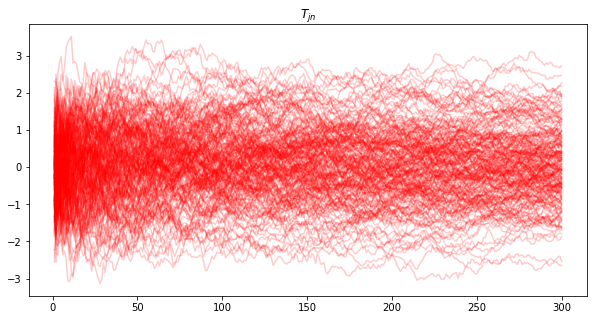

In [13]:
n = 200
size = 300

#Строим оценки
valuation = sps.norm.rvs(size=(n, size), loc=0, scale=1)
valuation = valuation.cumsum(axis=1) / np.linspace(1, size, size)
#Строим статистики
stat = valuation * np.sqrt(np.linspace(1, size, size))

plt.figure(figsize=(10, 5))
for j in range(0, n):
    plt.plot(range(1, size + 1), stat[j], alpha=0.2, color='red')
plt.title('$T_{jn}$')
#plt.ylim((-1.5, 1.5))
plt.show()

Видим, что $T_{jn}$ не сходится к константе

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


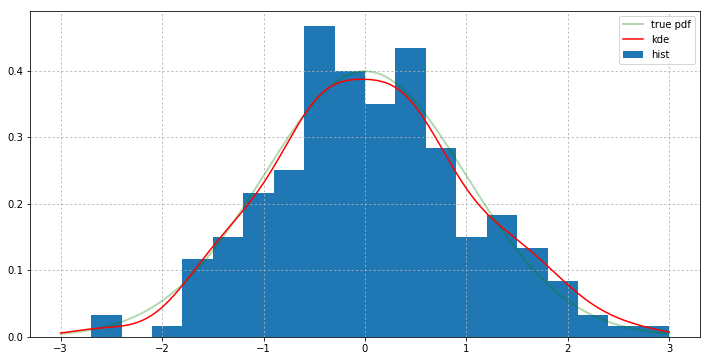

In [16]:
sample = stat[:, size - 1]

#Строим ядерную оценку плотности
grid = np.linspace(-3, 3, 500)
draw_pdf_and_hist(sample, grid, sps.norm.pdf)

Видим, что гистограмма и ядерная оценка плотности достаточно хорошо приближают $\mathcal{N}(0, 1)$

** Для $Pois(\theta)$ **

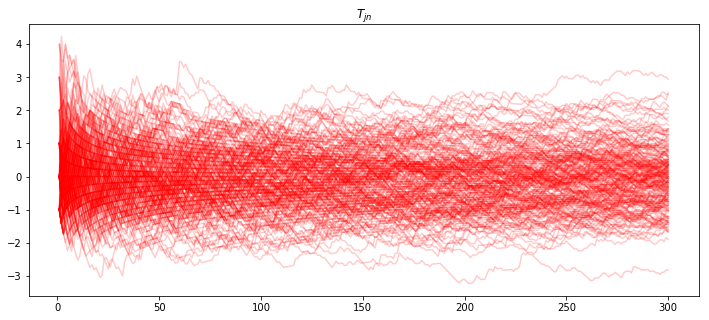

In [21]:
n = 200
size = 300
theta = 1
#Строим оценки
valuation = sps.poisson.rvs(mu=theta, size=(n, size))
valuation = np.cumsum(valuation, axis=1) / np.linspace(1, size, size)
#Строим статистики
stat = (valuation - theta) * np.sqrt(np.linspace(1, size, size))

plt.figure(figsize=(12, 5))
for j in range(0, n):
    plt.plot(range(1, size + 1), stat[j], alpha=0.2, color='red')
plt.title('$T_{jn}$')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


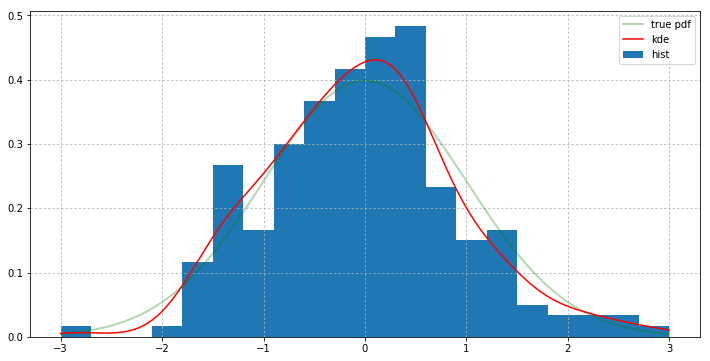

In [23]:
#Строим ядерную оценку плотности и гистограмму
sample = stat[:, size - 1]

grid = np.linspace(-3, 3, 500)
draw_pdf_and_hist(sample, grid, sps.norm.pdf)
plt.show()

**Вывод**

$\widehat{\theta}$ асимптотически нормальна, если  $\sqrt{n} \left( \widehat{\theta} - \theta \right)$ распределна как $\mathcal{N}(a, \sigma^2)$, что мы и наблюдали в обоих пунктах.

Т.к., например для Пуассоновского, $E\overline{X}=\theta$, $D\overline{X}=\theta$ то по ЦПТ $\sqrt{n} \left( \widehat{\theta} - \theta \right) \stackrel{d_\theta}{\longrightarrow} \mathcal{N}(0, \theta^2)$, что теоретически подтверждает эксперимент

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

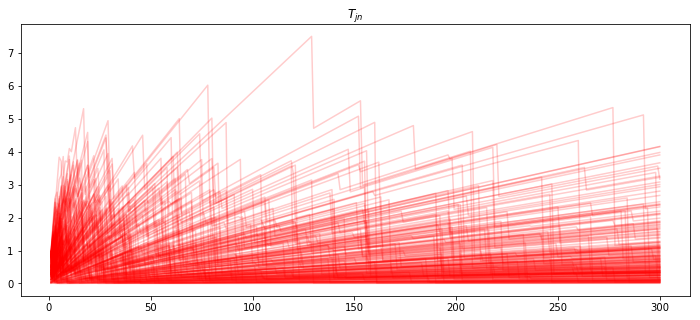

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


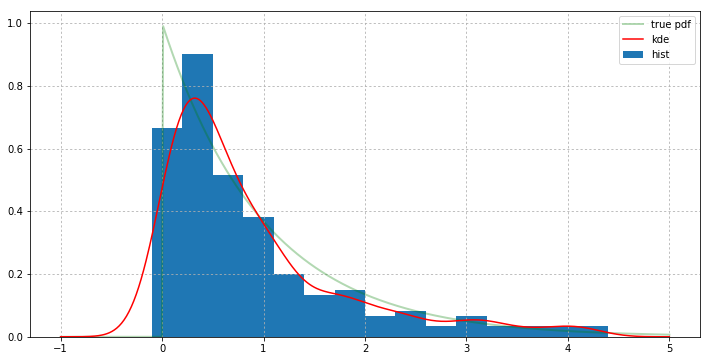

In [26]:
n = 200
size = 300
theta = 1
#Строим оценки
valuation = sps.uniform.rvs(loc=0, scale=theta, size=(n, size))
valuation = np.maximum.accumulate(valuation, axis=1)
#Строим статистики
stat = (theta - valuation) * np.linspace(1, size, size)

plt.figure(figsize=(12, 5))
for j in range(0, n):
    plt.plot(range(1, size + 1), stat[j], alpha=0.2, color='red')
plt.title('$T_{jn}$')
plt.show()
#Строим ядерную оценку плотности
sample = stat[:, size - 1]

grid = np.linspace(-1, 5, 500)
draw_pdf_and_hist(sample, grid, sps.expon.pdf)

**Вывод**

Ядерная оценка и гистограмма $n(\theta - X_{(n)})$ хорошо сглаживают плотность $Exp\left(1/\theta\right)$, что экспериментально подтверждает сходимость

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [27]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

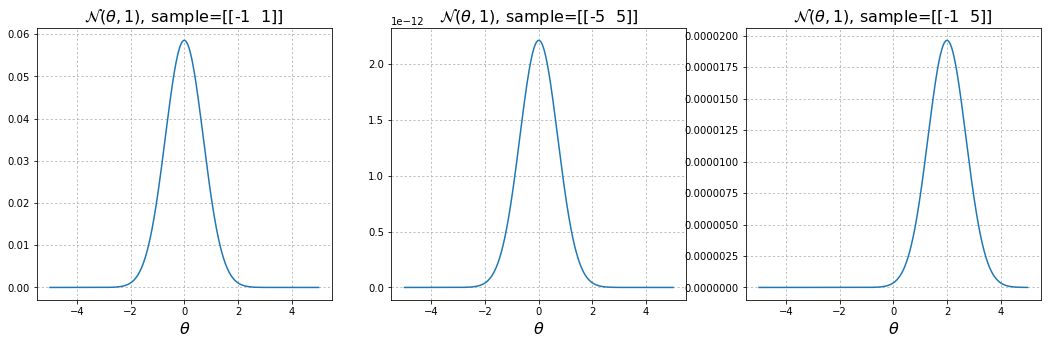

In [28]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

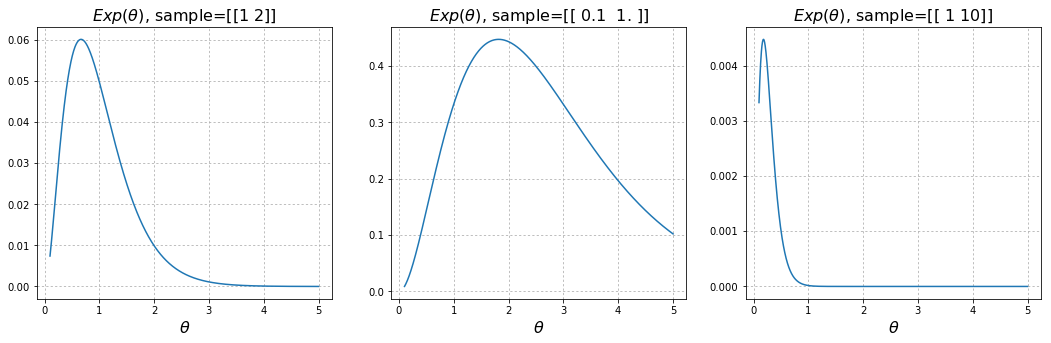

In [52]:
grid = np.linspace(0.1, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

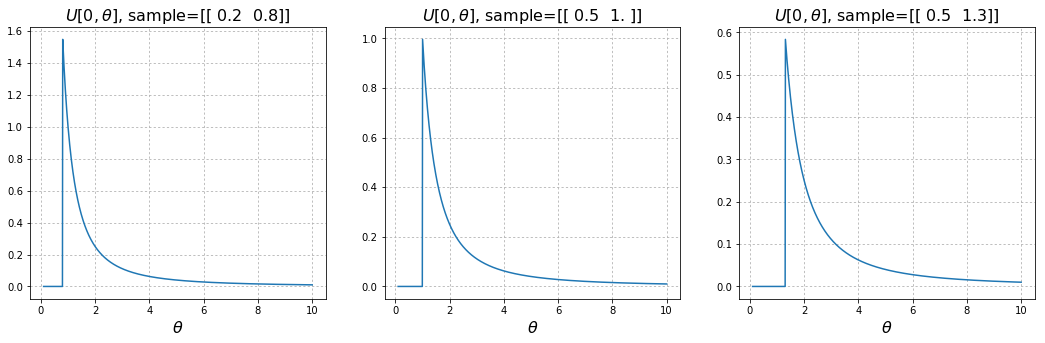

In [53]:
grid = np.linspace(0.1, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

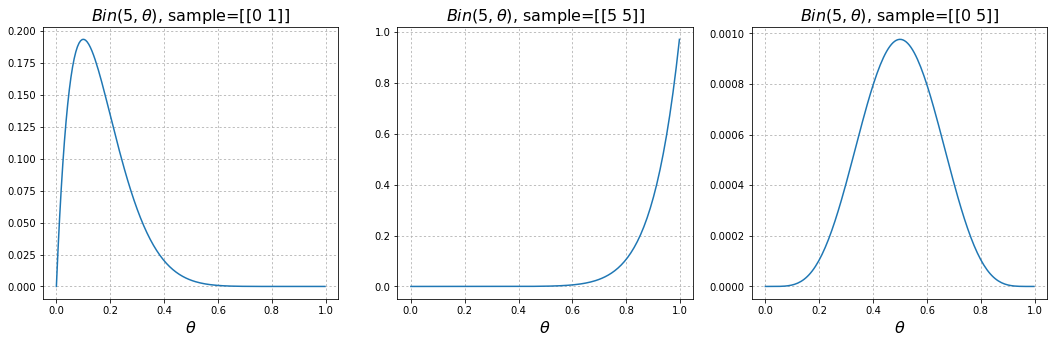

In [33]:
grid = np.linspace(0, 6, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

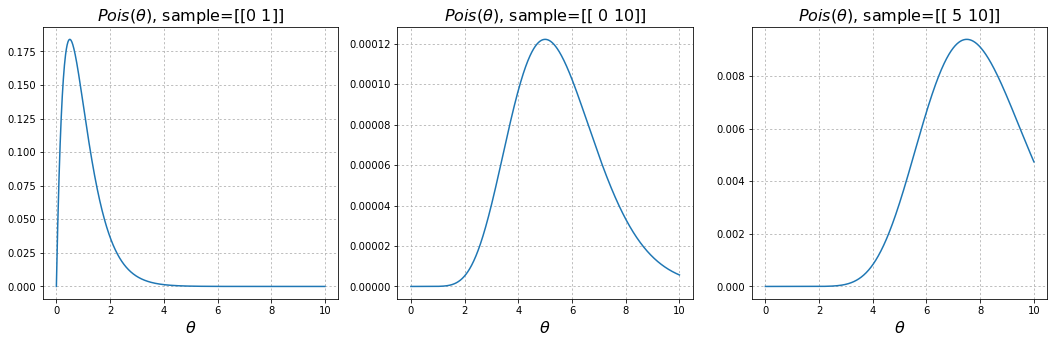

In [34]:
grid = np.linspace(0, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

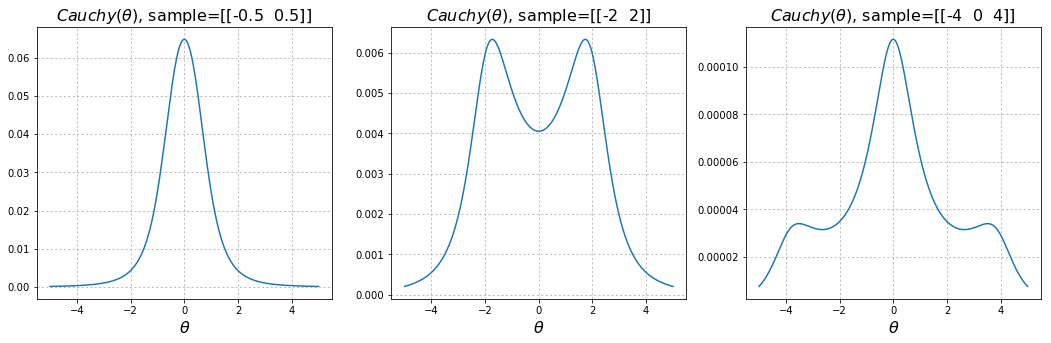

In [35]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** 

Чем больше значение функции правдоподобия в точке $\theta$, тем более правдоподобен именно такой исход.  

Пусть $P(\theta, X)$ - совместное распределние выборки. Тогда при фиксированном $\theta$ это плотность, а при фиксированном X (наш случай) - функция правдоподобия


Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [37]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

Проблема в том, что когда мы умножаем два числа близких к нулю, то теряется точность, поэтому получаем 0. Нужно брать логарифм функции правдоподобия

In [38]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-142329.578128


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

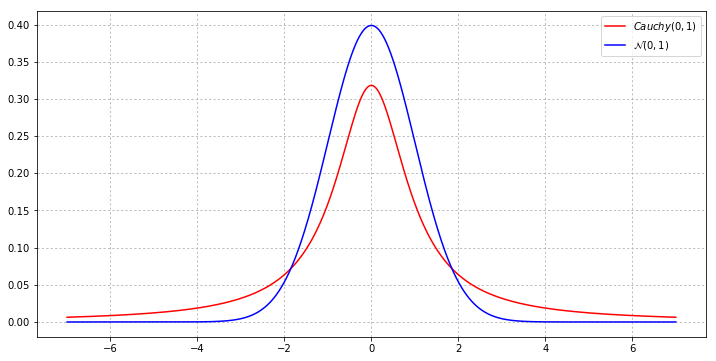

In [39]:
grid = np.linspace(-7, 7, 1000)
plt.figure(figsize=(12, 6))
plt.plot(grid, sps.cauchy.pdf(grid), color='red', label='$Cauchy(0, 1)$')
plt.plot(grid, sps.norm.pdf(grid), color='blue', label='$\\mathcal{N}(0, 1)$')
plt.grid(ls=':')
plt.legend()
plt.show()

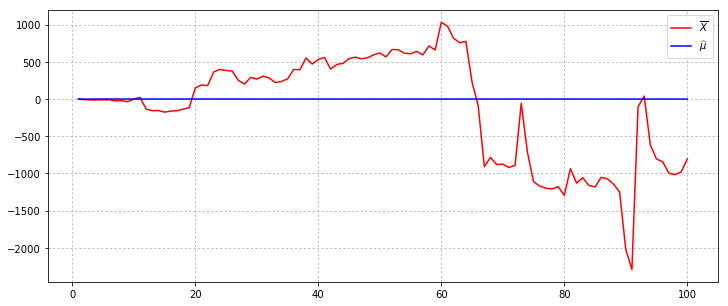

In [44]:
sample = sps.cauchy.rvs(size=100)
sample_mean = sample.cumsum() * np.arange(1, 101)
sample_median = np.array([np.median(sample[:i]) for i in np.arange(1, 101)])
plt.figure(figsize=(12, 5))
plt.plot(np.arange(1, 101), sample_mean, color='red', label='$\\overline{X}$')
plt.plot(np.arange(1, 101), sample_median, color='blue', label='$\\widehat{\mu}$')
plt.grid(ls=':')
plt.legend()
plt.show()

**Вывод**

Так как у распределния Коши большие хвосты (в отличие от нормального, например), то среднее значение будет плохо воспринимать отклонение от среднего значения. У медианы, как видно из графика, такой проблемы нет

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [61]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

Данные о погоде брались отсюда  http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind.html

In [54]:
wind_speed = [
    2.2, 2.7, 1.2, 1.0, 3.3, 2.8, 2.2, 3.3, 1.2, 2.2, 1.2, 1.5, 1.4, 2.4, 1.2,
    1.9, 3.6, 2.9, 2.2, 2.2, 3.6, 3.2, 3.0, 1.2, 3.3, 2.4, 2.4, 2.5, 2.8, 2.2,
    3.6, 2.7, 3.3, 2.8, 2.4, 1.7, 2.4, 1.5, 1.4, 4.1, 1.7, 4.7, 6.9, 7.5, 2.2,
    0.7, 2.9, 2.5, 0.1, 1.4, 3.3, 4.4, 3.1, 1.9, 1.0, 0.7, 3.2, 2.9, 1.7, 1.7,
    2.4, 3.2, 4.4, 4.1, 3.6, 4.4, 5.8, 4.7, 3.6, 2.2, 0.1, 1.4, 2.5, 3.2, 6.2,
    5.8, 3.6, 1.9, 4.1, 2.2, 2.2, 1.1, 3.9, 5.0, 5.5, 3.6, 2.5, 1.0, 0.5, 3.2,
    2.9, 3.4, 3.6, 3.9, 3.6, 3.1, 1.1, 1.5, 1.5, 1.7, 2.9, 2.2, 4.1, 6.4, 5.8,
    3.6, 1.2, 4.4, 4.6, 3.1, 3.1, 4.7, 2.8, 3.1, 2.8, 1.9, 2.4, 3.1, 4.7, 2.8,
    2.9, 1.0, 1.7, 3.1, 1.9, 1.1, 1.9, 1.7, 2.5, 1.9, 2.2, 0.6, 1.9, 1.1, 2.2,
    3.3, 2.4, 1.9, 2.2, 3.9, 3.6, 3.4, 2.8, 2.7, 0.8, 1.1, 3.3, 2.2
]

In [76]:
def find_grid(X ,Y):
    #находим догарифм плотности
    logpdf = sps.weibull_min(c=X, scale=Y).logpdf
    #считаем логарифмическую функцию правдоподобия и омп в сетке
    likelihood = np.sum([logpdf(x) for x in wind_speed], axis=0)
    MLE_arg = cool_argmax(likelihood)
    
    return (X[MLE_arg[0]][0], Y[0][MLE_arg[1]])

In [79]:
#считаем с большим шагом
X, Y = np.mgrid[0.1:10:10e-3, 0.1:10:10e-3]
c, scale = find_grid(X, Y)
#счиатем с маленьким шагом
X, Y = np.mgrid[c - 10e-3:c + 10e-3:10e-5, scale - 10e-3:scale + 10e-3:10e-5]
c, scale = find_grid(X, Y)

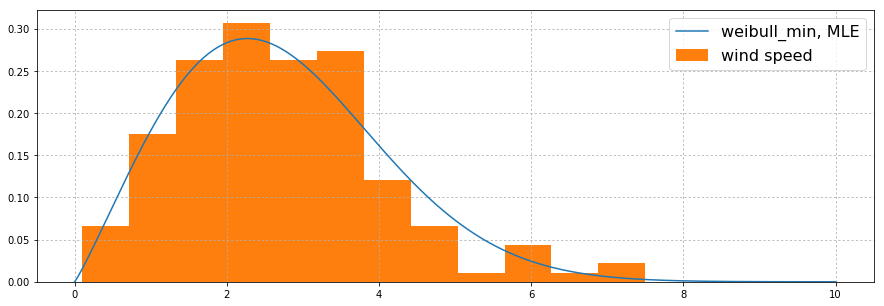

In [80]:
grid = np.linspace(0, 10, 1000)
plt.figure(figsize=(15, 5))
plt.plot(grid, sps.weibull_min(c=c, scale=scale).pdf(grid),
         label='weibull_min, MLE')
plt.hist(wind_speed, bins=12, normed=True, label='wind speed')
plt.grid(ls=':')
plt.legend(fontsize=16)
plt.show()

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

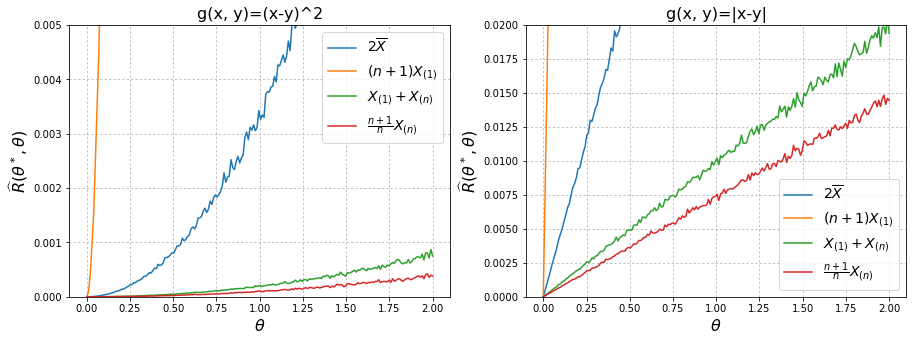

In [48]:
loss_functions_1 = [[], [], [], []]
loss_functions_2 = [[], [], [], []]
n = 2000
size = 100
for theta in np.linspace(0, 2, 200):
    sample = sps.uniform.rvs(size=(n, size), loc=0, scale=theta)
    # calc all estimations
    estimations = []
    estimations.append(2 * sample.mean(axis=1))
    estimations.append(sample.min(axis=1) * (size + 1))
    estimations.append(sample.min(axis=1) + sample.max(axis=1))
    estimations.append(sample.max(axis=1) * (size + 1) / size)
    # cal loss function
    for i in range(0, 4):
        loss_functions_1[i].append(np.mean((estimations[i] - theta) ** 2))
        loss_functions_2[i].append(np.mean(np.abs(estimations[i] - theta)))

labels = ["$2\\overline{X}$", "$(n+1)X_{(1)}$", "$X_{(1)}+X_{(n)}$", "$\\frac{n+1}{n} X_{(n)}$"]
plt.figure(figsize=(15, 5))
for i in range(0, 2):
    plt.subplot(1, 2, i + 1)
    for j in range(0, 4):
        if (i == 0):
            plt.plot(np.linspace(0, 2, 200), loss_functions_1[j], label=labels[j])
        else:
            plt.plot(np.linspace(0, 2, 200), loss_functions_2[j], label=labels[j])
    
    plt.grid(ls=':')
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.legend(fontsize=14)
    if (i == 0):
        plt.title("g(x, y)=(x-y)^2", fontsize=16)
        plt.ylim((0, 0.005))
    else:
        plt.title("g(x, y)=|x-y|", fontsize=16)
        plt.ylim((0, 0.02))

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод**
Из графиков видно, что для обеих функций риска функция потерь много меньше для $X_{(1)}+X_{(n)} и \frac{n+1}{n} X_{(n)}$, причём они располагаются так(в порядке улучшения): $(n+1)X_{(1)}, 2\overline{X},  X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

In [50]:
import math

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


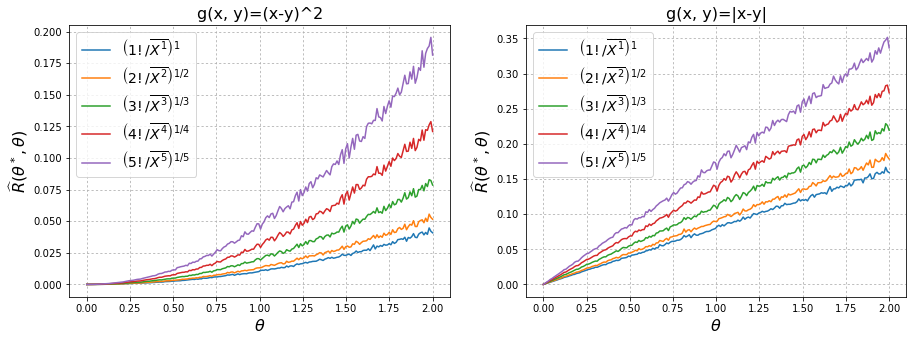

In [51]:
loss_functions_1 = [[], [], [], [], []]
loss_functions_2 = [[], [], [], [], []]
n = 2000
size = 100
for theta in np.linspace(0, 2, 200):
    sample = sps.expon.rvs(size=(n, size), scale=1 / theta)
    # calc all estimations
    estimations = []
    for i in range(0, 5):
        estimations.append(np.power(math.factorial(i+1) / np.mean(sample ** (i+1), axis=1),
                                    1 / (i+1)))
    # cal loss function
    for i in range(0, 5):
        loss_functions_1[i].append(np.mean((estimations[i] - theta) ** 2))
        loss_functions_2[i].append(np.mean(np.abs(estimations[i] - theta)))

labels = ["$\\left(1! / \\overline{X^1}\\right)^{1}$", "$\\left(2! / \\overline{X^2}\\right)^{1/2}$",
         "$\\left(3! / \\overline{X^3}\\right)^{1/3}$", "$\\left(4! / \\overline{X^4}\\right)^{1/4}$",
         "$\\left(5! / \\overline{X^5}\\right)^{1/5}$"]

plt.figure(figsize=(15, 5))
for i in range(0, 2):
    plt.subplot(1, 2, i + 1)
    for j in range(0, 5):
        if (i == 0):
            plt.plot(np.linspace(0, 2, 200), loss_functions_1[j], label=labels[j])
        else:
            plt.plot(np.linspace(0, 2, 200), loss_functions_2[j], label=labels[j])
    
    plt.grid(ls=':')
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.legend(fontsize=14)
    if (i == 0):
        plt.title("g(x, y)=(x-y)^2", fontsize=16)
    else:
        plt.title("g(x, y)=|x-y|", fontsize=16)

**Вывод**

$1/\overline{X}$ лучше в обоих подходах

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.